# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import pickle

In [2]:
seed = 42

random.seed(seed)
np.random.seed(seed)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print(
    "Чтобы результаты между запусками ноутбука совпадали.",
    "Таким образом мы фиксируем последовательность псевдослучайных чисел.",
    sep='\n'
)

Чтобы результаты между запусками ноутбука совпадали.
Таким образом мы фиксируем последовательность псевдослучайных чисел.


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('../data/cars_train.csv')
df_test = pd.read_csv('../data/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(n=10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [9]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [10]:
df_train.isna().sum(axis=0)

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [11]:
df_test.isna().sum(axis=0)

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

In [12]:
print("Пропуски есть в колонках mileage, engine, max_power, torque, seats.")

Пропуски есть в колонках mileage, engine, max_power, torque, seats.


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [13]:
feat_cols = df_train.drop('selling_price', axis=1).columns
df_train.duplicated(subset=feat_cols).sum()

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
df_train[df_train.duplicated(subset=feat_cols)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
df_train = df_train.drop_duplicates(subset=feat_cols, keep='first')

In [16]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [17]:
df_train = df_train.reset_index(drop=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [18]:
def prepare(val):
    if str(val) == 'nan':
        return val
    try:
        v1, _ = val.split()
    except:
        try:
            return float(val)
        except:
            return np.nan
    return float(v1)

In [19]:
# cast к float происходит в функции prepare 
df_train['mileage'] = df_train['mileage'].apply(prepare)
df_train['engine'] = df_train['engine'].apply(prepare)
df_train['max_power'] = df_train['max_power'].apply(prepare)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   int64  
 2   selling_price  5840 non-null   int64  
 3   km_driven      5840 non-null   int64  
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5654 non-null   float64
 9   engine         5654 non-null   float64
 10  max_power      5656 non-null   float64
 11  torque         5653 non-null   object 
 12  seats          5654 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 593.2+ KB


In [21]:
# cast к float происходит в функции prepare 
df_test['mileage'] = df_test['mileage'].apply(prepare)
df_test['engine'] = df_test['engine'].apply(prepare)
df_test['max_power'] = df_test['max_power'].apply(prepare)

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    float64
 9   engine         981 non-null    float64
 10  max_power      981 non-null    float64
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(4), int64(3), object(6)
memory usage: 101.7+ KB


In [23]:
def kgm_to_nm(val):
    return val * 9.80665


def convert_to_float(text):
    try:
        tmp_rmp_val = text.split(',')
        if len(tmp_rmp_val) > 1:
            rpm_val = 1000 * float(tmp_rmp_val[0]) + float(tmp_rmp_val[1])
        else:
            rpm_val = float(tmp_rmp_val[0])
    except:
        return np.nan
    return rpm_val


def convert_rpm(text):
    tmp_text = text[:-3] if 'rpm' in text.lower() else text
    if '~' in text:
        rpms = tmp_text.split('~')
    else:
        rpms = tmp_text.split('-')
    if len(rpms) > 1:
        rpm_val = convert_to_float(rpms[1].strip())
    else:
        rpm_val = convert_to_float(rpms[0].strip())
    return rpm_val


def prepare_torque(val):
    if str(val) == 'nan':
        return val
    try:
        if '@' in val:
            lst = val.split('@')
        elif 'at' in val:
            lst = val.split('at')
        elif '/' in val:
            lst = val.split('/')
        nm_val, rpm_val = np.nan, np.nan
        if len(lst) == 2:
            rpm_val = convert_rpm(lst[1])
            if 'kgm' in lst[0].lower():
                nm_val = kgm_to_nm(convert_to_float(lst[0][:-3].split()[0]))
            else:
                nm_val = convert_to_float(lst[0][:-2].split()[0])
        elif len(lst) == 3:
            rpm_val, units = lst[1].split('(')
            rpm_val = convert_rpm(rpm_val)
            if 'kgm' in units.lower():
                nm_val = kgm_to_nm(float(lst[0]))
            else:
                nm_val = float(lst[0])
        return nm_val, rpm_val
    except:
        if 'Nm' in val:
            lst = val.split()
            if len(lst) == 1:
                return float(lst[0][:-2]), np.nan
            else:
                return float(lst[0]), np.nan
        return np.nan, np.nan

In [24]:
df_train[['torque', 'max_torque_rpm']] = pd.DataFrame(
    df_train['torque'].apply(prepare_torque).tolist(), 
    index=df_train.index
)

In [25]:
df_test[['torque', 'max_torque_rpm']] = pd.DataFrame(
    df_test['torque'].apply(prepare_torque).tolist(), 
    index=df_test.index
)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [26]:
median_train = df_train.median(numeric_only=True, skipna=True)
df_train = df_train.fillna(median_train)

In [27]:
df_test = df_test.fillna(median_train)

In [28]:
df_train.isna().sum().sum(), df_test.isna().sum().sum()

(0, 0)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [29]:
print(
    "Число мест в автомобиле ограничено.",
    "Оно не может быть отрицательным и слишком большим.",
    sep='\n'
)

Число мест в автомобиле ограничено.
Оно не может быть отрицательным и слишком большим.


In [30]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].apply(
    lambda x: x.astype('int')
)

In [31]:
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].apply(
    lambda x: x.astype('int')
)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

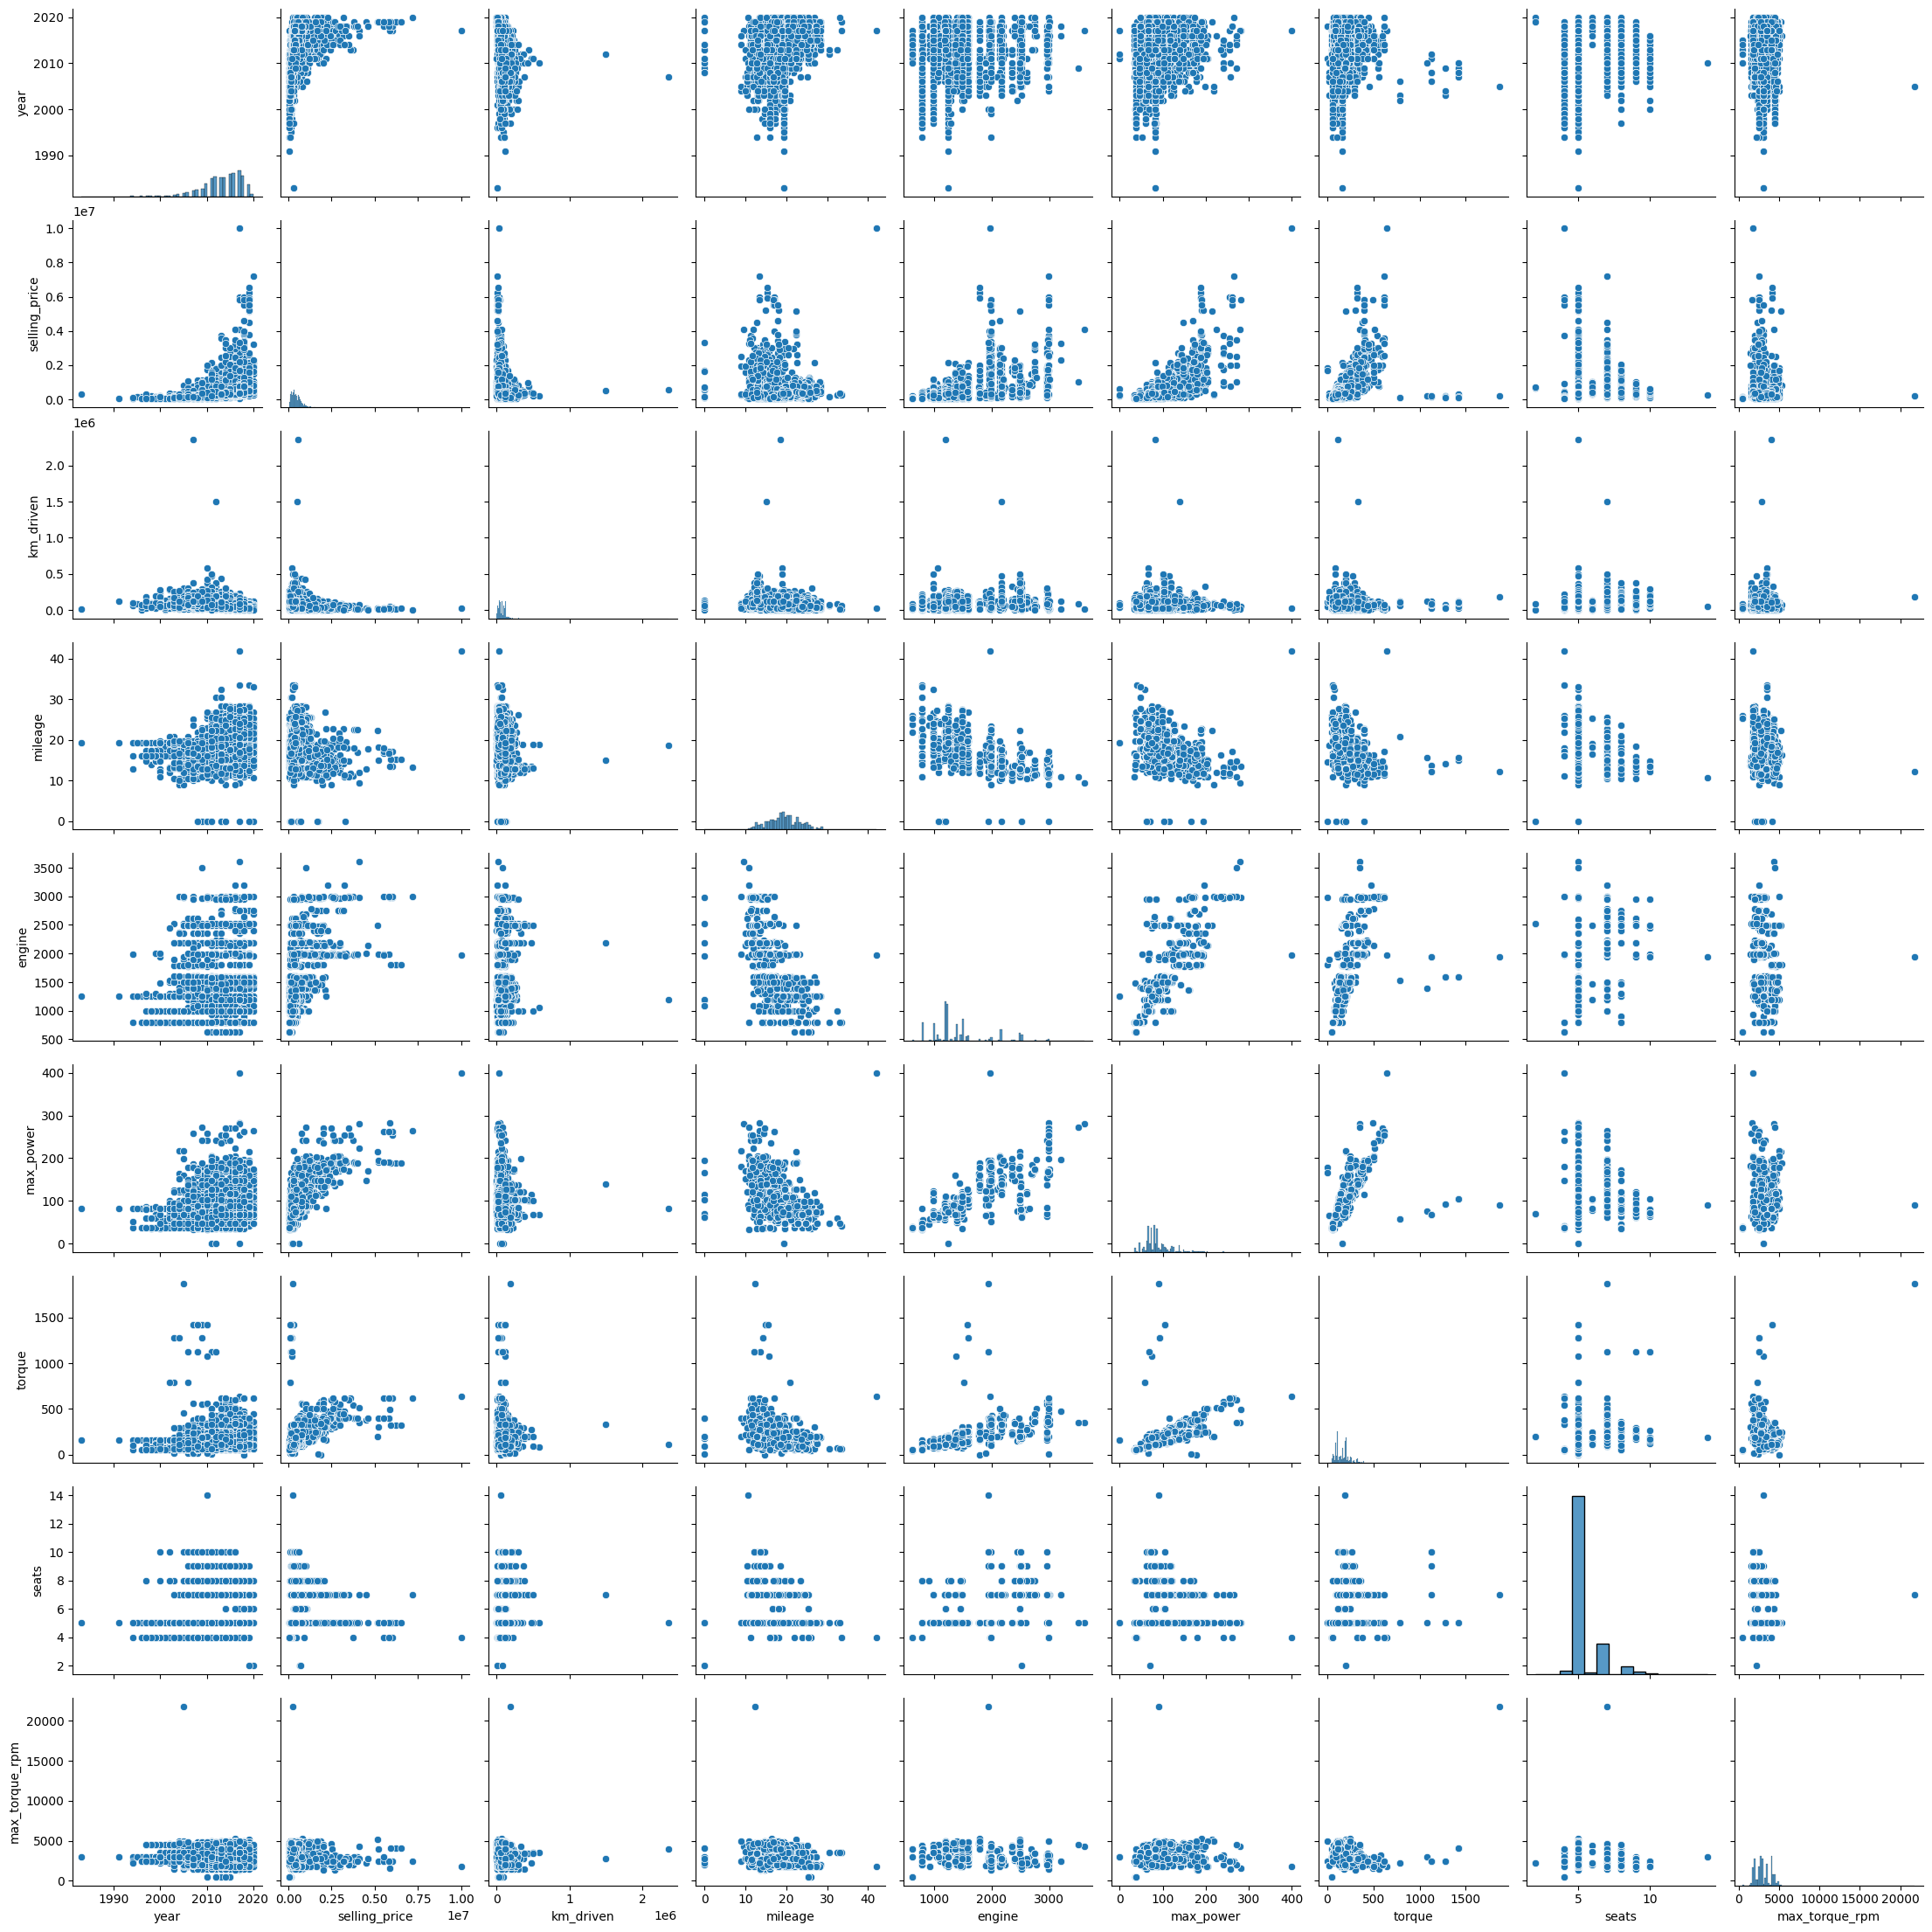

In [32]:
_ = sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

У многих предикторов наблюдается связь с целевой переменной, например чем новее автомобиль, тем выше его цена (в основном), чем меньше пробег, тем выше цена, также на цену влияет крутящий момент, максимальная мощность и объем двигателя, чем они выше тем дороже автомобиль. Параметр mileage - количество миль на одном баке обратно пропорционален цене, предполагаю, что это связано с бОльшей мощностью и тем самым бОльшим расходом топлива. Прямой связи параметров количества мест и максимального крутящего момента не наблюдается.

Для некоторых признаков можно наблюдать сильную корреляцию, например torque - max_power, torque - engine, max_power - engine, max_power - engine, связано это с тем, что такие параметры зависимы, зачастую чем выше мощность, тем выше крутящий момент, тем выше объем двигателя. Некоторые признаки либо слабо скоррелированы, либо вообще не коррелируют, например год выпуска и объем двигателя, зачастую объем двигателя не зависит от года выпуска.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

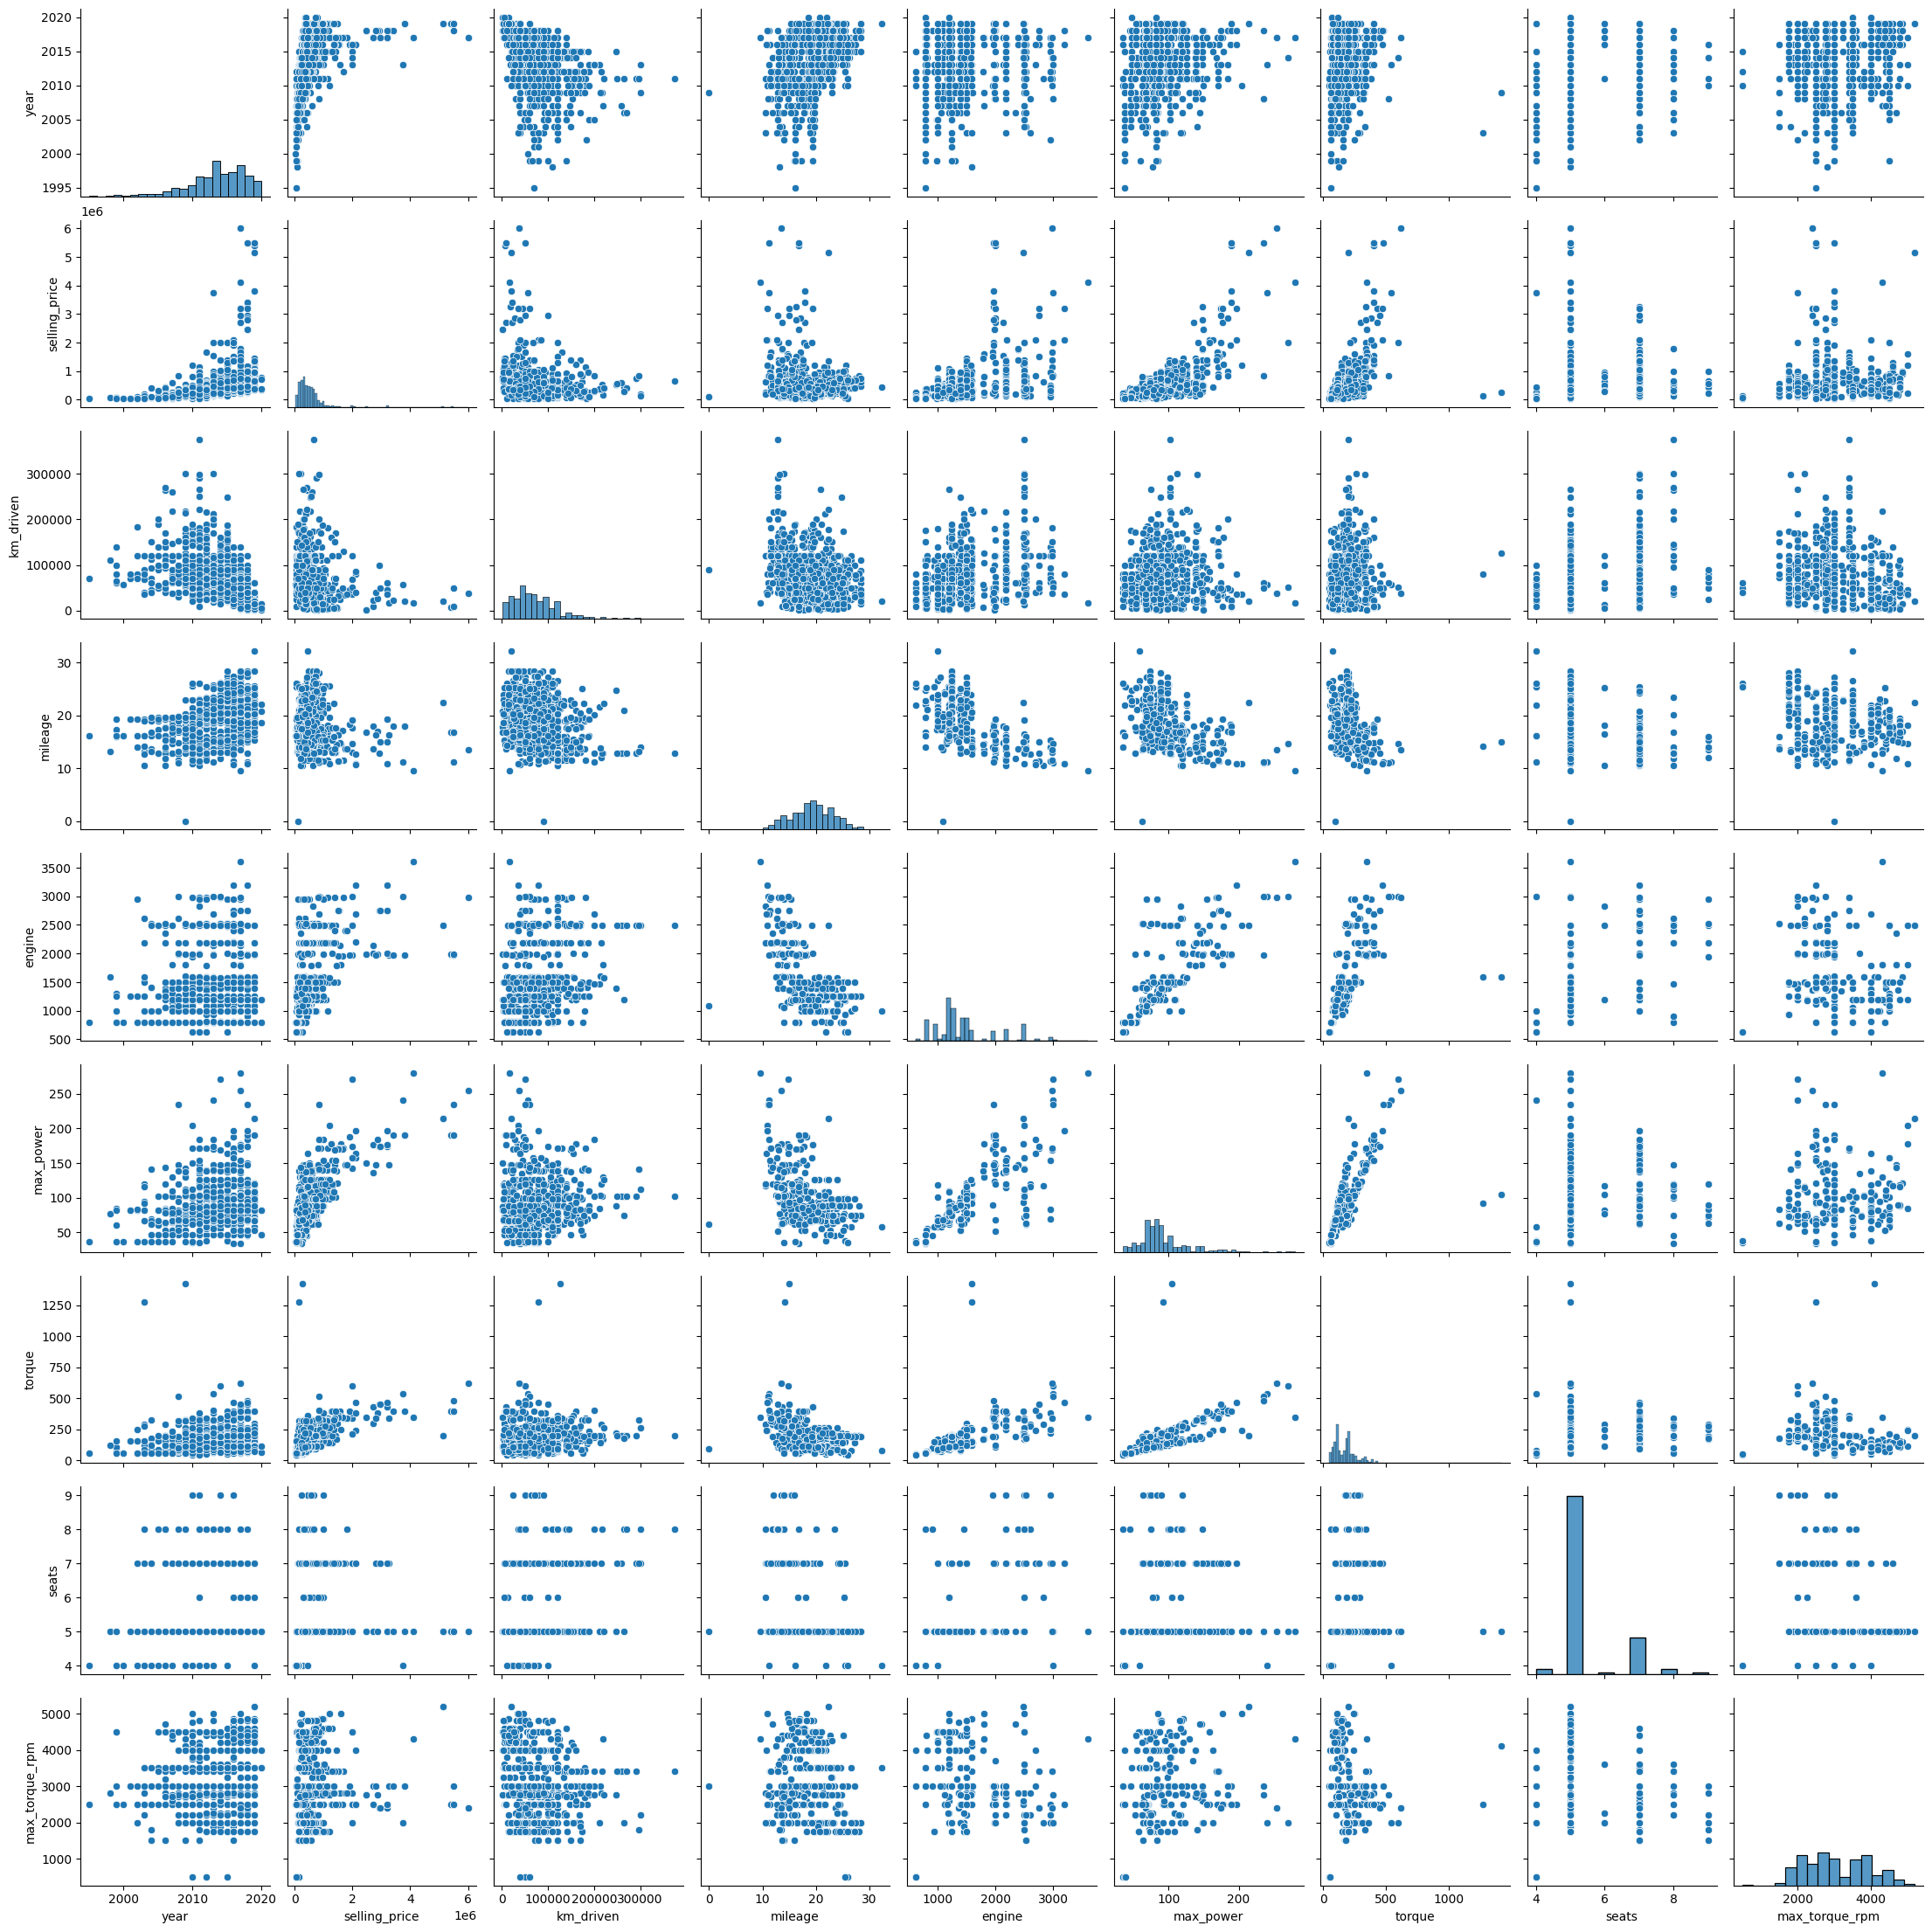

In [33]:
_ = sns.pairplot(df_test)

В целом совопкупности похожи, но есть интересные моменты, например max_torque_rpm на трейн и тест кажется на первый взгляд не похожим, но это не так, в трейне у нас есть какое-то очень большое значение max_torque_rpm, которое мб как выбросом, так и каким-то супер редким автомобилем с очень высоким числом оборотов в минуту (не знаю есть ли такие). Аналогичная ситуация с признаком km_driven, где у нас на трейне есть несколько супер больших значений больше 1 млн километров пробега. Эти два значения тоже мб выбросами, либо какими-то очень "живучими" автомобилями, я думаю что это скорее выбросы, но без выбросов распределения схожи.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

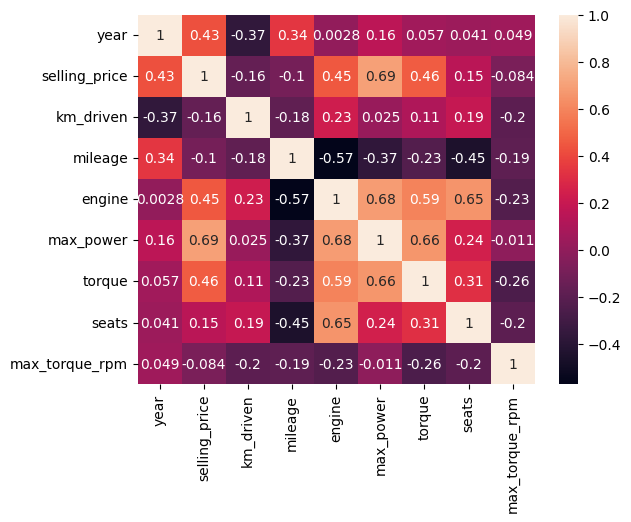

In [34]:
_ = sns.heatmap(df_train.corr(numeric_only=True), annot=True)

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

- Наименее скоррелированы year и engine (корреляция близка к 0, важно тут смотреть не на минимальную, а близкую к 0, т.к. -1 значит что они идеально обратно-пропорциональные).
- Между max_power и selling_price, year и selling_price, engine и selling_price, engine и max_power и т.д.
- В целом так можно сказать, у признаков year и km_driven действительно есть отрицательная корреляция в -0.37, но это далеко не всегда так, данное поведение можно увидеть на pairplot выше.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

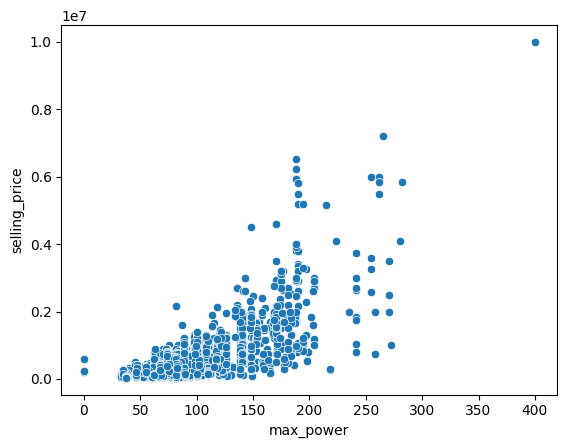

In [35]:
_ = sns.scatterplot(df_train, x='max_power', y='selling_price')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [36]:
print(
    "Посмотрим на распределение данных внутри колонок на train и test.",
    "В идеале данные распределения должны совпасть или быть похожими.",
    sep='\n'
)

Посмотрим на распределение данных внутри колонок на train и test.
В идеале данные распределения должны совпасть или быть похожими.


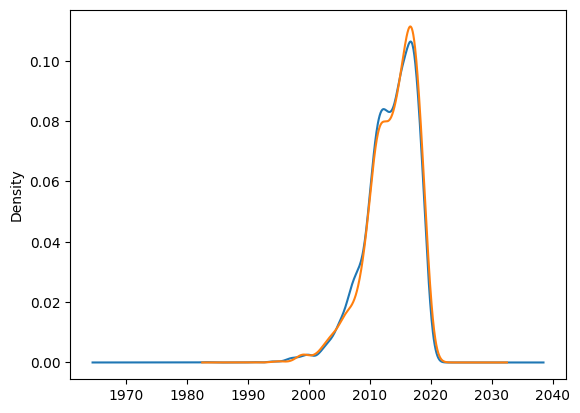

In [37]:
_ = df_train['year'].plot(kind='kde'), df_test['year'].plot(kind='kde')

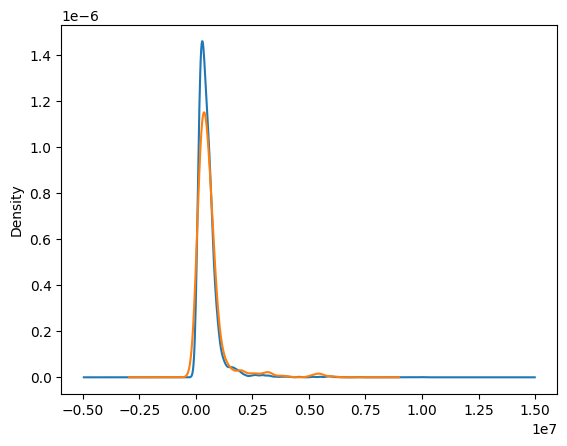

In [38]:
_ = df_train['selling_price'].plot(kind='kde'), \
    df_test['selling_price'].plot(kind='kde')

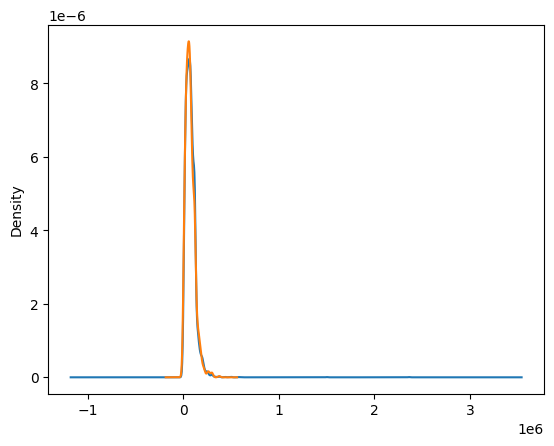

In [39]:
_ = df_train['km_driven'].plot(kind='kde'), \
    df_test['km_driven'].plot(kind='kde')

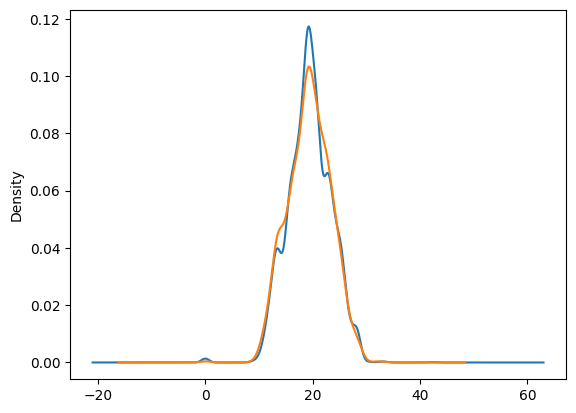

In [40]:
_ = df_train['mileage'].plot(kind='kde'), df_test['mileage'].plot(kind='kde')

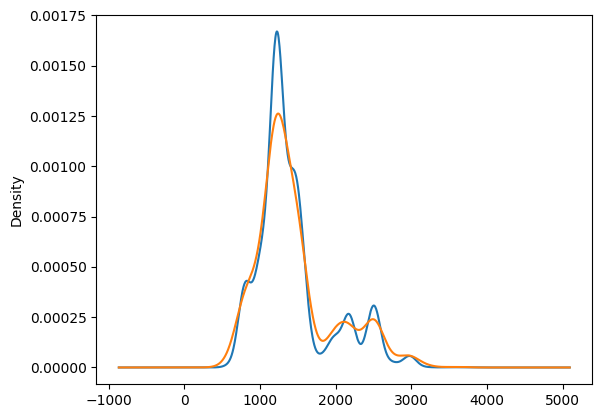

In [41]:
_ = df_train['engine'].plot(kind='kde'), df_test['engine'].plot(kind='kde')

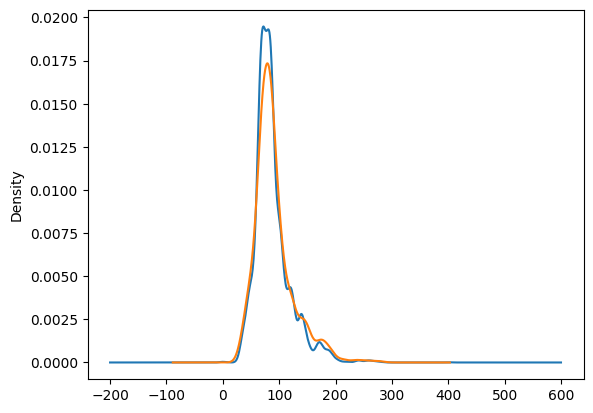

In [42]:
_ = df_train['max_power'].plot(kind='kde'), \
    df_test['max_power'].plot(kind='kde')

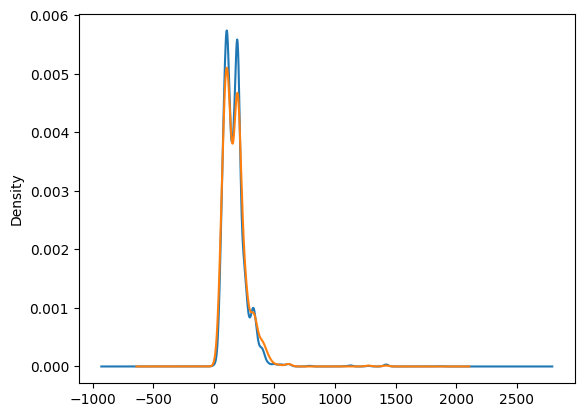

In [43]:
_ = df_train['torque'].plot(kind='kde'), df_test['torque'].plot(kind='kde')

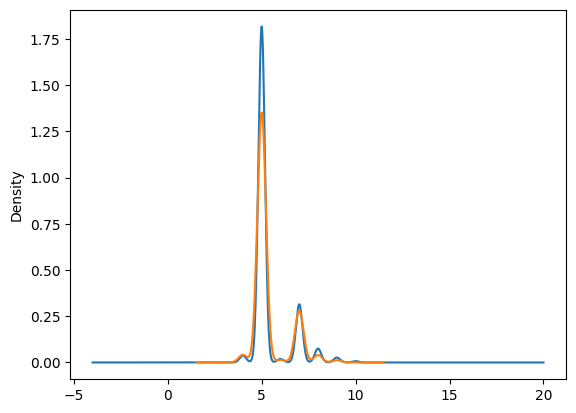

In [44]:
_ = df_train['seats'].plot(kind='kde'), df_test['seats'].plot(kind='kde')

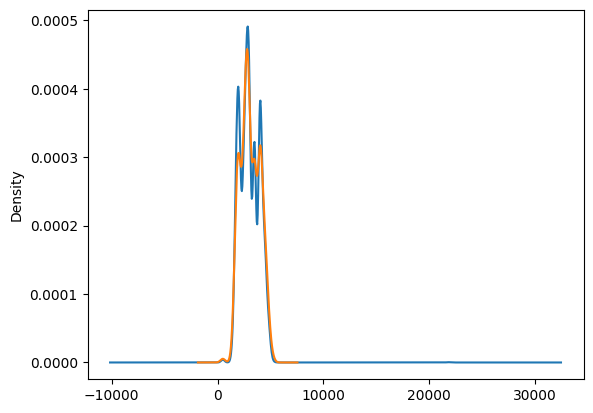

In [45]:
_ = df_train['max_torque_rpm'].plot(kind='kde'), \
    df_test['max_torque_rpm'].plot(kind='kde')

In [46]:
print("Видно, что распределения схожи -> разбиение сделано адекватно.")

Видно, что распределения схожи -> разбиение сделано адекватно.


In [47]:
print(
    "Давайте построим boxplot для каждого признака на трейне.",
    "Так мы сможем проанализировать квантили, медиану и выбросы.",
    "Не будем строить для test, т.к. выше выяснили, что распределения схожи.",
    sep='\n'
)

Давайте построим boxplot для каждого признака на трейне.
Так мы сможем проанализировать квантили, медиану и выбросы.
Не будем строить для test, т.к. выше выяснили, что распределения схожи.


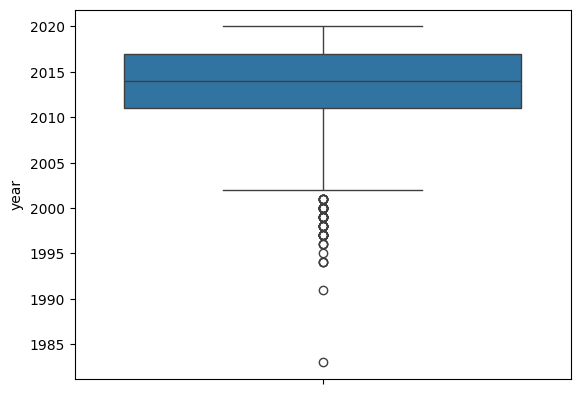

In [48]:
_ = sns.boxplot(df_train['year'])

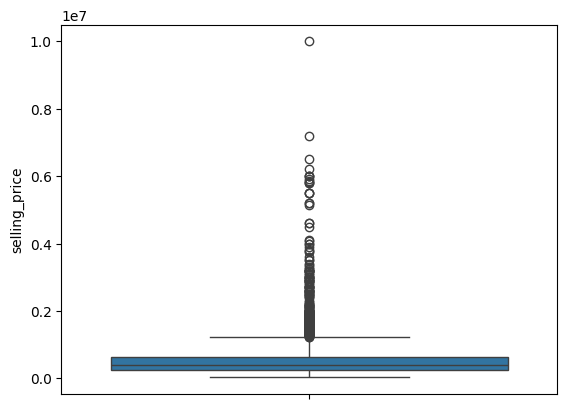

In [49]:
_ = sns.boxplot(df_train['selling_price'])

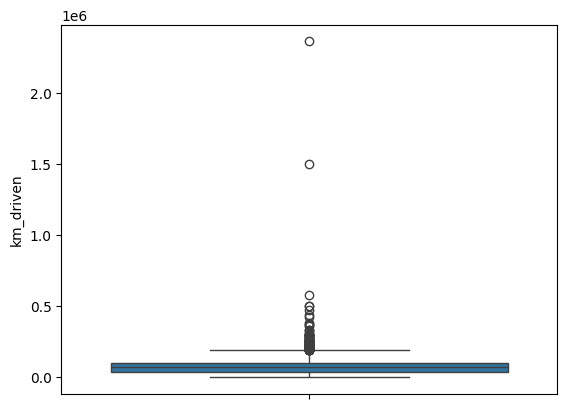

In [50]:
_ = sns.boxplot(df_train['km_driven'])

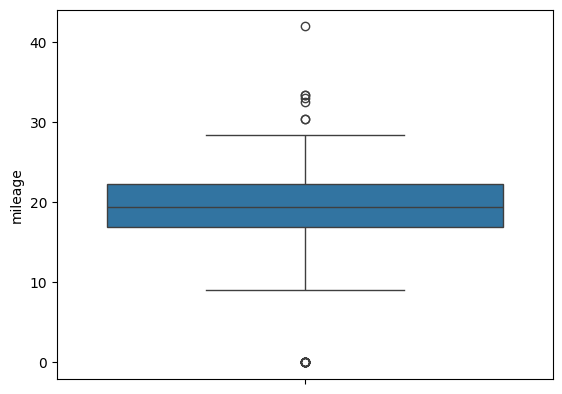

In [51]:
_ = sns.boxplot(df_train['mileage'])

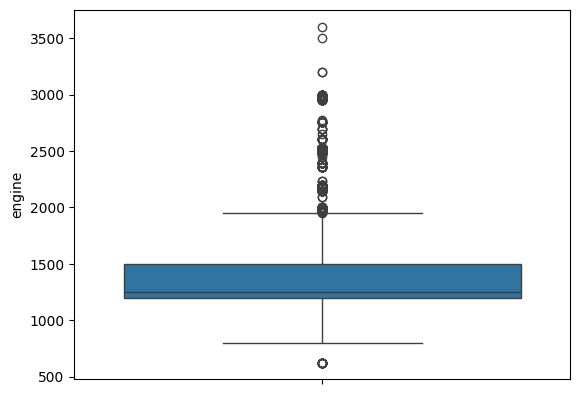

In [52]:
_ = sns.boxplot(df_train['engine'])

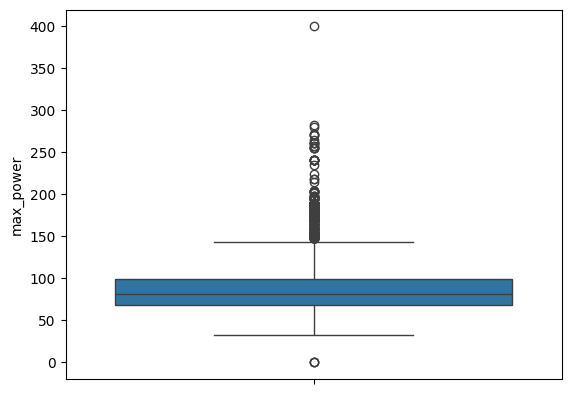

In [53]:
_ = sns.boxplot(df_train['max_power'])

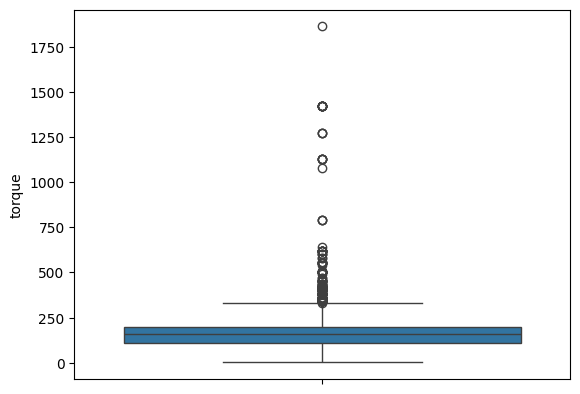

In [54]:
_ = sns.boxplot(df_train['torque'])

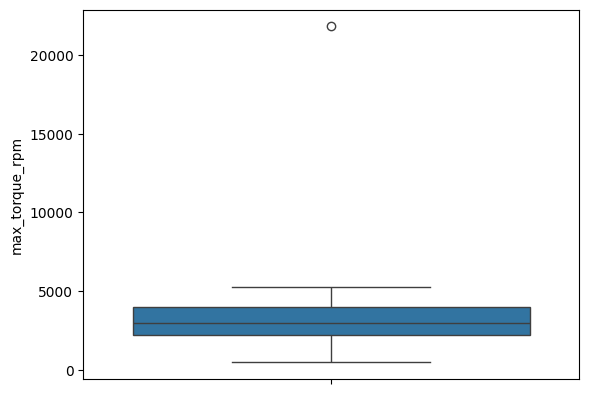

In [55]:
_ = sns.boxplot(df_train['max_torque_rpm'])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [56]:
numeric_cols = df_train._get_numeric_data().columns

In [57]:
y_train = df_train['selling_price']
X_train = df_train[numeric_cols].drop('selling_price', axis=1)

In [58]:
y_test = df_test['selling_price']
X_test = df_test[numeric_cols].drop('selling_price', axis=1)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [60]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.6007260103736083, 0.60133441640776)

In [61]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(229514090760.93796, 114272840441.35681)

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [64]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.6007260103736075, 0.6013344164077588)

In [65]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(229514090760.93842, 114272840441.35718)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

Наиболее информативным оказался признак max_power, после него идет year.

In [66]:
model.coef_

array([165884.27164333, -48693.62295034,  -9163.07895502,  22238.74978465,
       329768.07198504,   6853.65220232, -30236.87483282, -59763.11801243])

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [67]:
from sklearn.linear_model import Lasso

model = Lasso()

model.fit(X_train_scaled, y_train)

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [68]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.6007247252943115, 0.6013344163601535)

In [69]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(229514829461.214, 114272840455.00264)

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Не занулила, возможно потому что все признаки вносят какой-то весомый вклад и зануление их весов будет понижать качество, еще видно что веса очень большие, это может свидетельствовать о переобучении, но мне кажется дело в том, что наш target имеет очень большие значения, а признаки мы отскалировали. Стоит попробовать поставить alpha в нужном скейле.

In [70]:
model.coef_

array([165882.06603535, -48692.68916901,  -9159.77782613,  22236.72900871,
       329769.50189445,   6852.96418602, -30232.88631137, -59761.04391682])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [71]:
from sklearn.model_selection import GridSearchCV

grid = {
    'alpha': np.linspace(0.1, 10000.0, 10),
    'max_iter': [100, 1000, 3000],
}

model = Lasso()
grid_search = GridSearchCV(model, cv=10, param_grid=grid, scoring='r2')

In [72]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.0000e-01, 1.1112e+03, 2.2223e+03, 3.3334e+03, 4.4445e+03,
       5.5556e+03, 6.6667e+03, 7.7778e+03, 8.8889e+03, 1.0000e+04]),
                         'max_iter': [100, 1000, 3000]},
             scoring='r2')

In [73]:
model = grid_search.best_estimator_

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [74]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.5870838355102741, 0.5985460298276675)

In [75]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(237356002433.39548, 115072098937.37398)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

GridSearch делает полный перебор по сетке + cross валидацию -> количество моделей равно в моем случае 10 (количество alpha) * 3 (количество max_iter) * 10 (количество фолдов) = 300.

Лучший параметр alpha получился 10000, занулились признаки mileage и engine.

In [76]:
model.get_params()

{'alpha': 10000.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 100,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [77]:
model.coef_

array([ 1.53760573e+05, -3.90426566e+04,  0.00000000e+00,  0.00000000e+00,
        3.36297295e+05,  1.54052347e+03, -1.91483909e+02, -4.60844554e+04])

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [78]:
from sklearn.linear_model import ElasticNet

grid = {
    'alpha': np.linspace(0.1, 1.0, 10),
    'l1_ratio': np.linspace(0.1, 1.0, 10),
    'max_iter': [100, 1000, 3000],
}

model = ElasticNet()
grid_search = GridSearchCV(model, cv=10, param_grid=grid, scoring='r2')

In [79]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'max_iter': [100, 1000, 3000]},
             scoring='r2')

In [80]:
model = grid_search.best_estimator_

test_pred = model.predict(X_test_scaled)
train_pred = model.predict(X_train_scaled)

In [81]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.5733824920045512, 0.5939902941181519)

In [82]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(245231925931.09637, 116377947451.14717)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

alpha = 0.6, l1_ratio = 0.8 и max_iter = 100.

In [83]:
model.get_params()

{'alpha': 0.6,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.8,
 'max_iter': 100,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [84]:
X_train_cat = df_train.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test.drop(['selling_price', 'name'], axis=1)

X_train_cat['seats'] = X_train_cat['seats'].astype('str')
X_test_cat['seats'] = X_test_cat['seats'].astype('str')

In [85]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,5840,5840,5840,5840,5840
unique,4,3,2,5,9
top,Diesel,Individual,Manual,First Owner,5
freq,3177,5223,5336,3603,4618


In [86]:
X_test_cat.describe(include='object')

,fuel,seller_type,transmission,owner,seats
count,1000,1000,1000,1000,1000
unique,4,3,2,5,6
top,Diesel,Individual,Manual,First Owner,5
freq,534,837,877,623,777


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [87]:
from sklearn.preprocessing import OneHotEncoder

In [88]:
categories = []

for cat_feat in X_train_cat.describe(include='object').columns:
    categories += [X_train_cat[cat_feat].unique().tolist()]

categories_columns = X_train_cat.describe(include='object').columns

In [89]:
encoder = OneHotEncoder(
    drop='first', 
    categories=categories, 
    sparse_output=False
)

X_train_one_hot = encoder.fit_transform(X_train_cat[categories_columns])
X_test_one_hot = encoder.transform(X_test_cat[categories_columns])

X_train_numeric = X_train_cat.drop(categories_columns, axis=1)
X_train = pd.concat((X_train_numeric, pd.DataFrame(X_train_one_hot)), axis=1)

X_test_numeric = X_test_cat.drop(categories_columns, axis=1)
X_test = pd.concat((X_test_numeric, pd.DataFrame(X_test_one_hot)), axis=1)

num_one_hot = X_train_one_hot.shape[1]

X_train[[i for i in range(num_one_hot)]] = \
    X_train[[i for i in range(num_one_hot)]].astype(int)

X_test[[i for i in range(num_one_hot)]] = \
    X_test[[i for i in range(num_one_hot)]].astype(int)

In [90]:
numeric_cols = df_train.drop(
    ['selling_price', 'seats'], 
    axis=1
)._get_numeric_data().columns

In [91]:
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [92]:
X_train = \
    X_train.rename(columns={i: f'one_hot_{i}' for i in range(num_one_hot)})

X_test = \
    X_test.rename(columns={i: f'one_hot_{i}' for i in range(num_one_hot)})

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Качество предсказания подросло с 0.6 до 0.64 на тесте по r2.

In [93]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

grid = {
    'alpha': np.linspace(0.1, 1000.0, 10),
    'max_iter': [100, 1000, 3000],
}

model = Ridge()
grid_search = GridSearchCV(model, cv=10, param_grid=grid, scoring='r2')

In [94]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.000e-01, 1.112e+02, 2.223e+02, 3.334e+02, 4.445e+02, 5.556e+02,
       6.667e+02, 7.778e+02, 8.889e+02, 1.000e+03]),
                         'max_iter': [100, 1000, 3000]},
             scoring='r2')

In [95]:
model = grid_search.best_estimator_

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [96]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.6438934330597896, 0.6422044067034922)

In [97]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(204700223527.60614, 102557934334.28514)

In [98]:
model.coef_

array([148568.16079316, -34380.87134868,  16447.26588849,  36262.52074358,
       285006.25658094,  18701.10111815, -61191.29335368,  43805.83171194,
        47909.57917305,  14414.63799258, 107805.39421213,   -776.79581667,
       241988.45260464, -53790.5007255 , -37877.89595357, -26164.1131111 ,
       114709.59662296, 223274.22888395, -15053.9380028 ,  20400.70435161,
       -34622.31655705,  -7061.6419125 ,  -2410.73016756,  -1510.98425427,
         1293.80820563])

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [99]:
cond = \
    (df_train['max_torque_rpm'] < 5000) & \
    (df_train['km_driven'] < 500000)

df_train, y_train = df_train[cond], y_train[cond]

In [100]:
df_train['power_per_liter'] = df_train['max_power'] / df_train['engine'] * 1000
df_train['mileage_per_liter'] = \
    df_train['mileage'] / (df_train['engine'] / 1000)

In [101]:
df_test['power_per_liter'] = df_test['max_power'] / df_test['engine'] * 1000
df_test['mileage_per_liter'] = \
    df_test['mileage'] / (df_test['engine'] / 1000)

In [102]:
mark = []
names = df_train['name'].values.tolist()

for name in names:
    mark += [name.split()[0]]

names = df_test['name'].values.tolist()
for name in names:
    mark += [name.split()[0]]

mark = list(set(mark))

In [103]:
X_train_cat = df_train.drop(['selling_price'], axis=1)
X_test_cat = df_test.drop(['selling_price'], axis=1)

X_train_cat['seats'] = X_train_cat['seats'].astype('str')
X_test_cat['seats'] = X_test_cat['seats'].astype('str')

X_train_cat = X_train_cat.reset_index()
X_test_cat = X_test_cat.reset_index()

In [104]:
def get_mark(text):
    return text.split()[0]


X_train_cat['name'] = X_train_cat['name'].apply(get_mark)
X_test_cat['name'] = X_test_cat['name'].apply(get_mark)

In [105]:
categories = []

for cat_feat in X_train_cat.describe(include='object').columns:
    if cat_feat != 'name':
        categories += [X_train_cat[cat_feat].unique().tolist()]
    else:
        categories += [mark]

categories_columns = X_train_cat.describe(include='object').columns

In [106]:
encoder = OneHotEncoder(
    drop='first', 
    categories=categories, 
    sparse_output=False
)

X_train_one_hot = encoder.fit_transform(X_train_cat[categories_columns])
X_test_one_hot = encoder.transform(X_test_cat[categories_columns])

X_train_numeric = X_train_cat.drop(categories_columns, axis=1)
X_train = pd.concat((X_train_numeric, pd.DataFrame(X_train_one_hot)), axis=1)

X_test_numeric = X_test_cat.drop(categories_columns, axis=1)
X_test = pd.concat((X_test_numeric, pd.DataFrame(X_test_one_hot)), axis=1)

num_one_hot = X_train_one_hot.shape[1]

X_train[[i for i in range(num_one_hot)]] = \
    X_train[[i for i in range(num_one_hot)]].astype(int)

X_test[[i for i in range(num_one_hot)]] = \
    X_test[[i for i in range(num_one_hot)]].astype(int)

In [107]:
X_train = X_train.drop(['index'], axis=1)
X_test = X_test.drop(['index'], axis=1)

In [108]:
numeric_cols = df_train.drop(
    ['selling_price', 'seats'],
    axis=1
)._get_numeric_data().columns

In [109]:
scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [110]:
X_train = \
    X_train.rename(columns={i: f'one_hot_{i}' for i in range(num_one_hot)})

X_test = \
    X_test.rename(columns={i: f'one_hot_{i}' for i in range(num_one_hot)})

In [111]:
grid = {
    'alpha': np.linspace(0.1, 1000.0, 10),
    'max_iter': [1000, 2000, 4000],
    'fit_intercept': [False, True],
    'positive': [False, True]
}

model = Ridge()
grid_search = GridSearchCV(model, cv=10, param_grid=grid, scoring='r2')

In [112]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.000e-01, 1.112e+02, 2.223e+02, 3.334e+02, 4.445e+02, 5.556e+02,
       6.667e+02, 7.778e+02, 8.889e+02, 1.000e+03]),
                         'fit_intercept': [False, True],
                         'max_iter': [1000, 2000, 4000],
                         'positive': [False, True]},
             scoring='r2')

In [113]:
model = grid_search.best_estimator_

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [114]:
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)

test_r2, train_r2

(0.7283856740625659, 0.7770844038243636)

In [115]:
test_mse = MSE(y_test, test_pred)
train_mse = MSE(y_train, train_pred)

test_mse, train_mse

(156131670669.3249, 63218237786.92857)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [116]:
def business_metrics(y_true, y_pred):
    y_true = y_true.values
    diff = abs(y_true - y_pred)
    perc_diff = diff / y_true
    less_than_10_perc = (perc_diff <= 0.1).sum()
    metric = less_than_10_perc / y_true.shape[0]
    return metric

business_metrics(y_test, test_pred)

0.286

In [117]:
dump_dct = {
    'data_median': median_train,
    'regression_model': model,
    'standart_scaler': scaler,
    'one_hot_encoder': encoder
}

with open('../ckpt/ckpt.pkl', 'wb+') as f:
    pickle.dump(dump_dct, f)

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [118]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link